In [910]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [911]:
#設定 data_path
dir_data = './data'
f_train = os.path.join(dir_data, 'train_data.csv')
f_test =  os.path.join(dir_data, 'test_features.csv')

EnronFraud_train = pd.read_csv(f_train)
EnronFraud_test = pd.read_csv(f_test)



EnronFraud_train.head()

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,1617011.0,174839.0,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,1573324.0,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,602671.0,907502.0,True,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,375304.0,486.0,True,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


In [881]:
# 移除traing set異常點
EnronFraud_train[(EnronFraud_train.name == 'THE TRAVEL AGENCY IN THE PARK') | (EnronFraud_train.name == 'LOCKHART EUGENE E')]

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
65,THE TRAVEL AGENCY IN THE PARK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,362096.0,False,NaN,NaN,NaN,NaN,NaN,362096.0,NaN
107,LOCKHART EUGENE E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [882]:
EnronFraud_train = EnronFraud_train.drop([65,107])

In [883]:
EnronFraud_train_Labels = EnronFraud_train['poi']
names = EnronFraud_test['name']
EnronFraud_train = EnronFraud_train.drop(['poi','name'], axis = 1)
EnronFraud_test = EnronFraud_test.drop(['name'], axis = 1)
EnronFraud = pd.concat([EnronFraud_train, EnronFraud_test])
EnronFraud.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,4.0,NaN,1617011.0,174839.0,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,30.0,NaN,1920000.0,22122.0,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,14.0,NaN,NaN,1573324.0,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,NaN,NaN,602671.0,907502.0,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,25.0,NaN,375304.0,486.0,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


In [884]:
# EDA
EnronFraud.dtypes.value_counts()

float64    19
object      1
dtype: int64

In [885]:
EnronFraud.select_dtypes(include = ['object']).apply(pd.Series.nunique, axis = 0)

email_address    111
dtype: int64

In [886]:
#因唯一的類別型欄位email，對結果應較無影響, 所以只篩選出數值型特徵, 放於num_features 中
num_features = []
for dtype, feature in zip(EnronFraud.dtypes, EnronFraud.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)

In [887]:
# 只取用數值型欄位
EnronFraud = EnronFraud[num_features]
train_num = EnronFraud_train_Labels.shape[0]
EnronFraud.head()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1750000.0,NaN,-3504386.0,NaN,19794175.0,46950.0,18.0,42.0,4.0,NaN,1617011.0,174839.0,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,5600000.0,NaN,NaN,NaN,19250000.0,29336.0,108.0,88.0,30.0,NaN,1920000.0,22122.0,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,200000.0,NaN,-4167.0,NaN,1624396.0,22884.0,39.0,13.0,14.0,NaN,NaN,1573324.0,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,800000.0,NaN,NaN,NaN,NaN,118134.0,NaN,NaN,NaN,NaN,602671.0,907502.0,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,1250000.0,NaN,-262500.0,NaN,NaN,35818.0,144.0,199.0,25.0,NaN,375304.0,486.0,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


 ### 高於群體者可能poi會是true, 先都不移除outlier

In [888]:
#增加新特徵
EnronFraud['fraction_from_poi'] = EnronFraud['from_poi_to_this_person'] / EnronFraud['to_messages']
EnronFraud['fraction_to_poi'] = EnronFraud['from_this_person_to_poi'] / EnronFraud['from_messages']

In [889]:
#檢查欄位缺值數量
EnronFraud.isnull().sum().sort_values()

total_stock_value             18
total_payments                20
restricted_stock              34
exercised_stock_options       42
expenses                      49
salary                        49
other                         52
fraction_to_poi               58
to_messages                   58
from_messages                 58
from_poi_to_this_person       58
from_this_person_to_poi       58
shared_receipt_with_poi       58
fraction_from_poi             58
bonus                         62
long_term_incentive           78
deferred_income               95
deferral_payments            105
restricted_stock_deferred    126
director_fees                127
loan_advances                140
dtype: int64

In [890]:
#選擇用0補空值(也較合理, 代表無此金額)
EnronFraud  = EnronFraud.fillna(0)

#使用標準化 或 最大最小化)
#因EDA發現欄位大部分都有極端值 且不去除  所以使用標準化比較適合
SSEncoder = StandardScaler()
for c in EnronFraud.columns:
    EnronFraud[c] = EnronFraud[c].fillna(0)
    EnronFraud[c] = SSEncoder.fit_transform(EnronFraud[c].values.reshape(-1, 1))
EnronFraud.head()



,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,...,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,fraction_from_poi,fraction_to_poi
0,0.049012,-0.161759,-1.306047,-0.164865,0.594636,-0.057081,-0.239054,0.043814,-0.259431,-0.120393,...,-0.112649,0.089140,-0.014399,0.022501,0.150333,-0.149591,-0.144449,0.456894,0.654069,0.606084
1,0.523118,-0.161759,0.162644,-0.164865,0.573832,-0.097654,-0.176797,0.665281,0.067609,-0.120393,...,-0.153983,0.463627,-0.014399,0.334888,1.247633,1.071156,0.158167,0.554544,0.043817,0.905918
2,-0.141862,-0.161759,0.160898,-0.164865,-0.100032,-0.112515,-0.224527,-0.347980,-0.133646,-0.120393,...,0.265858,-0.082695,-0.014399,-0.071942,-0.569712,-0.454554,-0.088984,-0.094418,0.967345,1.344136
3,-0.067975,-0.161759,0.162644,-0.164865,-0.162136,0.106886,-0.251505,-0.523612,-0.309745,-0.120393,...,0.085650,-0.072105,-0.014399,-0.066305,-0.654478,-0.555460,-0.064978,-0.135902,-0.624746,-0.593249
4,-0.012560,-0.161759,0.052630,-0.164865,-0.162136,-0.082723,-0.151895,2.164908,0.004717,-0.120393,...,-0.159839,-0.150655,-0.014399,-0.059121,1.383632,0.609676,-0.102476,-0.159523,1.485927,0.343730


In [891]:
EnronFraud_train = EnronFraud[:train_num]

In [892]:
#cross val score 目前的結果
estimator = GradientBoostingClassifier()
cross_val_score(estimator, EnronFraud_train, EnronFraud_train_Labels, cv=5).mean()

0.8289855072463768

In [893]:
# 隨機森林擬合後, 將結果依照重要性由高到低排序
estimator = GradientBoostingClassifier()
estimator.fit(EnronFraud_train, EnronFraud_train_Labels)
feats = pd.Series(data = estimator.feature_importances_, index = EnronFraud_train.columns)
feats = feats.sort_values(ascending = False)
feats

exercised_stock_options      0.298647
expenses                     0.141741
fraction_to_poi              0.118782
shared_receipt_with_poi      0.110086
deferred_income              0.093857
other                        0.066103
bonus                        0.063996
total_stock_value            0.031215
from_poi_to_this_person      0.019820
restricted_stock             0.019306
fraction_from_poi            0.010335
long_term_incentive          0.007206
salary                       0.006781
from_messages                0.005703
total_payments               0.005106
from_this_person_to_poi      0.001105
to_messages                  0.000207
restricted_stock_deferred    0.000004
loan_advances                0.000000
director_fees                0.000000
deferral_payments            0.000000
dtype: float64

In [894]:
#只選擇特徵重要的 可提升cross val scor
high_feature = list(feats[:8].index)

estimator = GradientBoostingClassifier()
cross_val_score(estimator, EnronFraud_train[high_feature], EnronFraud_train_Labels, cv=5).mean()

0.855072463768116

In [895]:
high_feature

['exercised_stock_options',
 'expenses',
 'fraction_to_poi',
 'shared_receipt_with_poi',
 'deferred_income',
 'other',
 'bonus',
 'total_stock_value']

In [896]:
#整體資料集只選擇特徵重要性前幾名的特徵
EnronFraud = EnronFraud[high_feature]

Numbers of remain columns 8


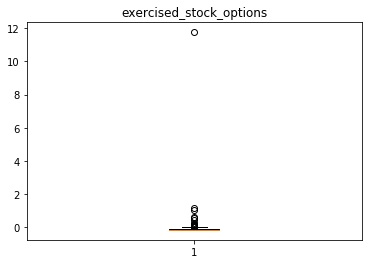

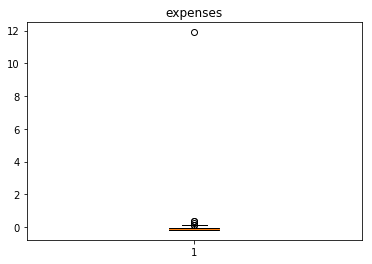

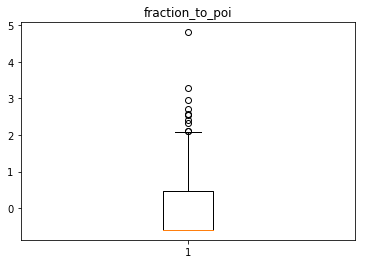

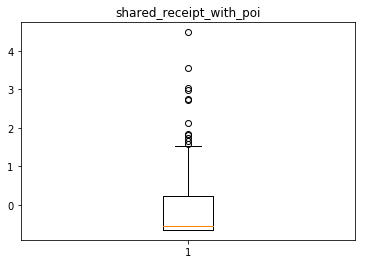

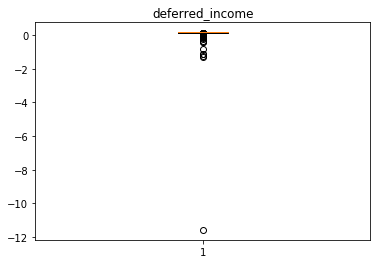

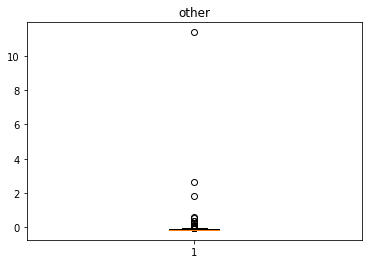

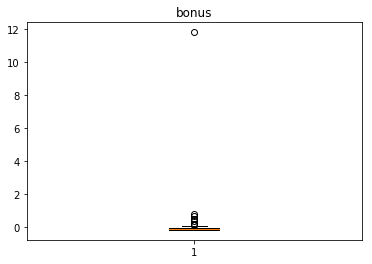

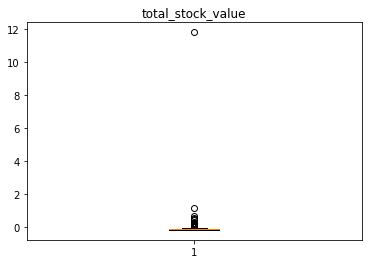

In [897]:
# 用boxplot 觀察各欄位離群值
print("Numbers of remain columns %s" % len(high_feature))
for col in high_feature:
    plt.boxplot(EnronFraud[col])
    plt.title(col)
    plt.show()

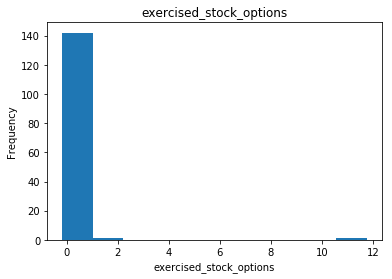

In [898]:
EnronFraud['exercised_stock_options'].plot.hist(title = 'exercised_stock_options');
plt.xlabel('exercised_stock_options');

In [899]:
EnronFraud_train

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,...,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,fraction_from_poi,fraction_to_poi
0,0.049012,-0.161759,-1.306047,-0.164865,0.594636,-0.057081,-0.239054,0.043814,-0.259431,-0.120393,...,-0.112649,0.089140,-0.014399,0.022501,0.150333,-0.149591,-0.144449,0.456894,0.654069,0.606084
1,0.523118,-0.161759,0.162644,-0.164865,0.573832,-0.097654,-0.176797,0.665281,0.067609,-0.120393,...,-0.153983,0.463627,-0.014399,0.334888,1.247633,1.071156,0.158167,0.554544,0.043817,0.905918
2,-0.141862,-0.161759,0.160898,-0.164865,-0.100032,-0.112515,-0.224527,-0.347980,-0.133646,-0.120393,...,0.265858,-0.082695,-0.014399,-0.071942,-0.569712,-0.454554,-0.088984,-0.094418,0.967345,1.344136
3,-0.067975,-0.161759,0.162644,-0.164865,-0.162136,0.106886,-0.251505,-0.523612,-0.309745,-0.120393,...,0.085650,-0.072105,-0.014399,-0.066305,-0.654478,-0.555460,-0.064978,-0.135902,-0.624746,-0.593249
4,-0.012560,-0.161759,0.052630,-0.164865,-0.162136,-0.082723,-0.151895,2.164908,0.004717,-0.120393,...,-0.159839,-0.150655,-0.014399,-0.059121,1.383632,0.609676,-0.102476,-0.159523,1.485927,0.343730
5,-0.166491,-0.158029,0.162644,-0.164865,1.014114,0.014390,-0.251505,-0.523612,-0.309745,-0.120393,...,-0.159197,-0.162179,-0.014399,-0.167765,-0.654478,-0.555460,-0.159767,0.683027,-0.624746,-0.593249
6,-0.166491,-0.161759,0.162644,-0.164865,0.155517,-0.040964,-0.251505,-0.523612,-0.309745,-0.120393,...,-0.119927,0.164840,-0.014399,-0.096115,-0.654478,-0.555460,-0.149805,0.163823,-0.624746,-0.593249
7,-0.018717,-0.151720,0.102267,-0.164865,-0.162136,-0.127188,-0.223836,2.718824,-0.171382,-0.120393,...,-0.132434,-0.098330,-0.014399,-0.037249,0.399973,0.232958,-0.107988,-0.143788,3.137085,0.890926
8,0.695521,-0.087982,0.036914,-0.164865,1.151074,0.064729,-0.226603,1.138136,-0.108490,8.300021,...,2.643946,1.187676,-0.014399,0.317276,1.591355,1.360870,3.669102,1.187457,0.168448,1.805418
9,-0.092604,-0.161759,0.162644,-0.164865,-0.147427,0.124954,-0.240437,0.178916,-0.234274,-0.120393,...,-0.105756,-0.126167,-0.014399,-0.043386,0.159648,-0.163942,-0.116057,-0.141580,1.016585,1.430626


In [900]:
EnronFraud_train = EnronFraud[:train_num]

In [901]:
#把training set切分訓練集、驗證集,以避免testing set 在切分為public& private得出的預測結果差距過大
x_train, x_val, y_train, y_val= train_test_split(EnronFraud_train, EnronFraud_train_Labels, test_size = 0.25, random_state = 4)
x_train.shape

(83, 8)

In [902]:
#使用default參數建立模型
clf = GradientBoostingClassifier()
#訓練模型
clf.fit(x_train, y_train)

#預測
y_pred = clf.predict_proba(x_val)[:,1]

In [903]:
#評估auc
auc = metrics.roc_auc_score( y_val, y_pred)  # 使用 roc_auc_score 來評估。 **這邊特別注意 y_pred 必須要放機率值進去!**
print("AUC: ", auc)

AUC:  0.7333333333333333


In [904]:
#設定要訓練的超參數組合
n_estimators = [100, 200, 300, 400, 500]
max_depth = [1, 2 ,3, 4, 5]
para_grid = dict(n_estimators = n_estimators, max_depth = max_depth)

#建立模型
clf = GradientBoostingClassifier(random_state=0)

#建立搜尋物件,放入模型與超參數組合字典
grid_search = GridSearchCV(clf, para_grid, scoring = 'roc_auc', n_jobs = -1, verbose= 1)

#開始搜尋最佳參數
grid_result = grid_search.fit(x_train, y_train)

C:\Users\Alex.Chiu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    8.9s finished


In [905]:
#印出最佳結果,最佳參數
print("Best auc : %f using %s" %(grid_result.best_score_, grid_result.best_params_))

Best auc : 0.757952 using {'max_depth': 2, 'n_estimators': 200}


In [908]:
#使用最佳參數with KFOLD重新建立模型
clf_bestparam2 = GradientBoostingClassifier(max_depth= grid_result.best_params_['max_depth'], 
                                 n_estimators = grid_result.best_params_['n_estimators'] )
clf_bestparam2.fit(x_train, y_train)
y_pred = clf_bestparam2.predict_proba(x_val)[:,1]
#評估auc
auc = metrics.roc_auc_score( y_val, y_pred)  # 使用 roc_auc_score 來評估。 **這邊特別注意 y_pred 必須要放機率值進去!**
print("AUC: ", auc)

AUC:  0.7066666666666667


In [909]:
#使用最佳參數with KFOLD重新建立模型
clf_bestparam2 = GradientBoostingClassifier(max_depth= grid_result.best_params_['max_depth'], 
                                 n_estimators = grid_result.best_params_['n_estimators'] )
result = np.zeros(5)
i=0    
kf = KFold(n_splits=5, shuffle = True)
for train_index, val_index in kf.split(EnronFraud_train):    
    x_train, x_val = EnronFraud_train.loc[train_index], EnronFraud_train.loc[val_index]
    y_train, y_val = EnronFraud_train_Labels.loc[train_index], EnronFraud_train_Labels.loc[val_index]
    clf_bestparam2.fit(x_train, y_train)
    y_pred = clf_bestparam2.predict_proba(x_val)[:,1]
    result[i] = metrics.roc_auc_score( y_val, y_pred)
    i+=1

C:\Users\Alex.Chiu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
C:\Users\Alex.Chiu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  if __name__ == '__main__':


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [844]:
result

array([0., 0., 0., 0., 0.])

In [877]:
# 預測testing set
EnronFraud_test_pred = clf_bestparam2.predict_proba(EnronFraud[train_num:])[:,1] #EnronFraud[train_num:]即為testing set
submission = pd.DataFrame(EnronFraud_test_pred)
print(EnronFraud_test_pred.shape)

(33,)


In [878]:
#建立完整的submission格式
submission.columns = ['poi']
submission['name'] = names
submission= submission[['name', 'poi']]
submission.to_csv('EnronFraud_submission.csv', index=False)